# Text age classifier

Our goal is to classify given text to categories. First category means that given text is OK to be given to child to read, second category means that text suits adult but not children.

# We have several main tasks:
- Prepare training, test data
 * Find data 
 * Prepare data
- Build model
 * Train model

In [1]:
import io
import re
import random
import numpy as np
import scrapingData as sd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Preparing data

What to do:
- Create dictionary with all words
- Make list of lists containing data
- Norm data so model can train on it
- Create labels (1 - adult, 0 - child)
- Split data to train, validation and test data

### Creating dictionary 

First of all, we should create dictionary with top 10 000 used words in russian language matched to numbers from 0 to 9999.
We need this to represent poems as arrays of numbers, where each number represents a word from array.

I found top 10 000 words from website, now we should parse them into list.

In [49]:
with open(r'files/parsed_top_words.txt', 'r') as infile, \
     open(r'files/filtered_top_words.txt', 'w') as outfile:
    data = infile.read()
    data = data.replace("<tr><td class=text>", "")
    data = data.replace("</td> </tr>", "")
    outfile.write(data)

In [50]:
with open('files/filtered_top_words.txt', 'r') as f:
    wordList = [line.strip() for line in f]

In [51]:
str(wordList[:10])

"['не', 'на', 'что', 'как', 'он', 'по', 'из', 'это', 'от', 'за']"

In [52]:
len(wordList)

10000

Creating a dictinary that contains words and numbers.

In [53]:
values = list(range(1, 10001))
dictionary = dict(zip(wordList, values))

In [54]:
str(list(dictionary.items())[:10])

"[('не', 1), ('на', 2), ('что', 3), ('как', 4), ('он', 5), ('по', 6), ('из', 7), ('это', 8), ('от', 9), ('за', 10)]"

### Making a list of lists containing data

Downloading our data.

### Parsing adult data

In [19]:
bad_list = sd.get_bad_categories(123123)
bad_list = bad_list[2]
bad_list = [bad_list]

In [20]:
adultTales = sd.scraping_bad_tales(bad_list)

C:\Users\Alexander\Documents\GitHub\PoemClassifier\scrapingData.py:34: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 34 of the file C:\Users\Alexander\Documents\GitHub\PoemClassifier\scrapingData.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  while (not "В данную категорию пока не добавлено ни одного секрета." in BeautifulSoup(get_html(url)).text):
C:\Users\Alexander\Documents\GitHub\PoemClassifier\scrapingData.py:13: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a d

In [21]:
adultTalesultTales[:3]

['Около 15 лет назад в нашем маленьком городке случилось горе, сгорел детский сад, дети не пострадали, но 2 воспитателя не смогли вовремя выбраться из здания. Виновников пожара не нашли. Я знаю, кто виноват в этом пожаре. Это парень с нашей подростковой компании. Я тоже была там, мы сидели во дворе детского сада и соревновались, кто дальше кинет сигаретный окурок. Общаемся до сих пор; не так плотно, но при встрече всегда болтаем. Тему пожара ни разу не поднимали.',
 'Есть вещь, за которую до сих пор себя не могу простить. В детстве (лет 9-10) вставала ночью на кухню и из окна услышала неистовые крики женщины на улице вперемешку с пьяными мужскими голосами. Судя по звукам и крикам, ее насиловали четверо сразу в гаражах под домом. Вместо того, чтобы позвать родителей или позвонить в полицию (сделать хоть что-нибудь) я просто впала в ступор и молча слушала этот ужас около двух часов. Не знаю, как так получилось, но мне до сих пор больно за свое бездействие.',
 'Жила в бывшем военном город

In [22]:
len(adultTales)

2142

### Parsing children tales 

In [38]:
childTales = sd.scraping_good_other_tales(sd.get_good_categories_other())

ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
eban

ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
eban

ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
eban

ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
ebaniy site
eban

In [39]:
childTales[-3:]

['Стрекоза Что за чудо - стрекоза! Только крылья и глаза! В воздухе трепещет И на солнце блещет. ',
 'Улитка А ты знаешь, что улитка Не способна бегать прытко? Только ползать, не спеша, Тихо листьями шурша. ',
 'Шмель С первым солнцем шмель проснулся, Встpепенулся, отряхнулся... Лепестков открытие Для шмелей событие! ']

In [40]:
len(childTales)

434

In [25]:
'''
with io.open('files/tales(1).txt', encoding='utf-8') as file:
    data = file.read().replace('\n', '').lower()

adultTales = data.split('@')

with io.open('files/tales(2).txt', encoding='utf-8') as file:
    data = file.read().replace('\n', '').lower()

funnyTales = data.split('@')
'''

"\nwith io.open('files/tales(1).txt', encoding='utf-8') as file:\n    data = file.read().replace('\n', '').lower()\n\nadultTales = data.split('@')\n\nwith io.open('files/tales(2).txt', encoding='utf-8') as file:\n    data = file.read().replace('\n', '').lower()\n\nfunnyTales = data.split('@')\n"

In [42]:
adultTales = adultTales[:434]

In [43]:
len(adultTales), len(childTales)

(434, 434)

Merging adult tales and tales for children in one list.

In [58]:
# Download and add second list.
data = adultTales + childTales

In [59]:
data[1]

'Есть вещь, за которую до сих пор себя не могу простить. В детстве (лет 9-10) вставала ночью на кухню и из окна услышала неистовые крики женщины на улице вперемешку с пьяными мужскими голосами. Судя по звукам и крикам, ее насиловали четверо сразу в гаражах под домом. Вместо того, чтобы позвать родителей или позвонить в полицию (сделать хоть что-нибудь) я просто впала в ступор и молча слушала этот ужас около двух часов. Не знаю, как так получилось, но мне до сих пор больно за свое бездействие.'

So, we have a list of strings. Now we should transform each string to list of words.

In [60]:
data = list(map(lambda x: re.findall(r'\w+', x), data))

In [61]:
str(data[1])

"['Есть', 'вещь', 'за', 'которую', 'до', 'сих', 'пор', 'себя', 'не', 'могу', 'простить', 'В', 'детстве', 'лет', '9', '10', 'вставала', 'ночью', 'на', 'кухню', 'и', 'из', 'окна', 'услышала', 'неистовые', 'крики', 'женщины', 'на', 'улице', 'вперемешку', 'с', 'пьяными', 'мужскими', 'голосами', 'Судя', 'по', 'звукам', 'и', 'крикам', 'ее', 'насиловали', 'четверо', 'сразу', 'в', 'гаражах', 'под', 'домом', 'Вместо', 'того', 'чтобы', 'позвать', 'родителей', 'или', 'позвонить', 'в', 'полицию', 'сделать', 'хоть', 'что', 'нибудь', 'я', 'просто', 'впала', 'в', 'ступор', 'и', 'молча', 'слушала', 'этот', 'ужас', 'около', 'двух', 'часов', 'Не', 'знаю', 'как', 'так', 'получилось', 'но', 'мне', 'до', 'сих', 'пор', 'больно', 'за', 'свое', 'бездействие']"

Now we transform each word to number from dictionary.

In [62]:
data = list(map(lambda x: list(map(lambda y: dictionary.get(y, 0), x)), data))

In [64]:
str(data[1])

'[0, 553, 10, 0, 21, 0, 0, 35, 1, 0, 2015, 0, 0, 54, 0, 0, 0, 0, 2, 0, 0, 7, 0, 0, 0, 0, 0, 2, 0, 8664, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1874, 99, 0, 0, 36, 0, 0, 0, 26, 3181, 0, 18, 2122, 0, 0, 133, 123, 3, 0, 0, 80, 0, 0, 0, 0, 306, 0, 50, 748, 125, 0, 0, 0, 0, 4, 14, 0, 12, 0, 21, 0, 0, 516, 10, 96, 7178]'

And at the end we transform data to numpy array of lists

In [65]:
data = np.array(data, dtype=object)

### Norming data

Now we should make training data arrays same on size.

In [66]:
len(data[0]), len(data[1])

(77, 87)

In [67]:
data = keras.preprocessing.sequence.pad_sequences(data,
                                                  value=0,
                                                  padding='post',
                                                  maxlen=128)

In [68]:
len(data[0]), len(data[1])

(128, 128)

In [69]:
data[1]

array([   0,  553,   10,    0,   21,    0,    0,   35,    1,    0, 2015,
          0,    0,   54,    0,    0,    0,    0,    2,    0,    0,    7,
          0,    0,    0,    0,    0,    2,    0, 8664,    0,    0,    0,
          0,    0,    6,    0,    0,    0,    0,    0, 1874,   99,    0,
          0,   36,    0,    0,    0,   26, 3181,    0,   18, 2122,    0,
          0,  133,  123,    3,    0,    0,   80,    0,    0,    0,    0,
        306,    0,   50,  748,  125,    0,    0,    0,    0,    4,   14,
          0,   12,    0,   21,    0,    0,  516,   10,   96, 7178,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

In [70]:
data

array([[  0,   0,  54, ...,   0,   0,   0],
       [  0, 553,  10, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,  10, ...,   0,   0,   0],
       [  0,   0,  28, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

###  Creating labels

Assuming that we have same number of child tales and adult tales, we will create an array, that filled for half with zeros, and for half with ones.

In [71]:
zeros = [0 for i in range(int (len(data)/2))]
ones = [1 for i in range(int (len(data)/2))]

labels = zeros + ones
labels = np.array(labels)

In [72]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
len(data), len(labels)

(868, 868)

### Splitting data into train, validation and test

Firstly we should shuffle our tales (now they are located in way where first half is tales for children and second half is tales for adults).

We should notice that it is important to shuffle list of data and list of labels synchronously to keep data and labels matched.

In [78]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

In [79]:
labels

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,

Now we will choose half of our data for training, 1/4 for validation, 1/4 for testing.

In [80]:
train_data = data[:int((len(data))/2)]
train_labels = labels[:int((len(data))/2)]

validation_data = data[int((len(data))/2): 3*int((len(data))/4)]
validation_labels = labels[int((len(data))/2): 3*int((len(data))/4)]

test_data = data[3*int((len(data))/4):]
test_labels = labels[3*int((len(data))/4):]

In [81]:
len(train_data), len(train_labels), len(validation_data), len(validation_labels), len(test_data), len(test_labels)

(434, 434, 217, 217, 217, 217)

In [82]:
train_data

array([[   0,  107,    0, ...,    0,    0,    0],
       [   0,  325,    0, ...,    0,    0,    0],
       [   0, 1022,    0, ...,    0,    0,    0],
       ...,
       [   0,    2,    0, ...,    0,    0,    0],
       [   0,  553,   10, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

## Bulding model

First layer gets a vector of vords and transforms it into 10000 vector where 1 sign that this word exists in vector.

In [83]:
model = keras.Sequential()
model.add(keras.layers.Embedding(len(dictionary), 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


Compiling our model.

In [84]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training model

In [85]:
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=32,
                    validation_data=(validation_data, validation_labels),
                    verbose=1)

Train on 434 samples, validate on 217 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
434/434 [==============================] - 4s 10ms/sample - loss: 0.6927 - acc: 0.5069 - val_loss: 0.6924 - val_acc: 0.4747
Epoch 2/20
434/434 [==============================] - 0s 194us/sample - loss: 0.6907 - acc: 0.5023 - val_loss: 0.6912 - val_acc: 0.4747
Epoch 3/20
434/434 [==============================] - 0s 216us/sample - loss: 0.6892 - acc: 0.5069 - val_loss: 0.6893 - val_acc: 0.4885
Epoch 4/20
434/434 [==============================] - 0s 216us/sample - loss: 0.6866 - acc: 0.5115 - val_loss: 0.6873 - val_acc: 0.4885
Epoch 5/20
434/434 [==============================] - 0s 212us/sample - loss: 0.6838 - acc: 0.5253 - val_loss: 0.6847 - val_acc: 0.4977
Epoch 6/20
434/434 [==============================] - 0s 234us/sample - loss: 0.6799 - acc: 0.5576 - val_loss: 0.6808 - val_acc: 0.5484
Epoch 7/20
434/434 [==============================] - 0s 205us/sample - loss: 0.6752 - acc:

## Analysing results

In [87]:
results = model.evaluate(test_data, test_labels)

217/217 [==============================] - 0s 97us/sample - loss: 0.4659 - acc: 0.9309


In [88]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

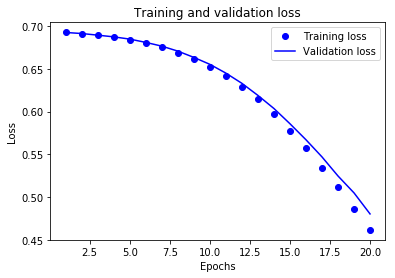

In [89]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

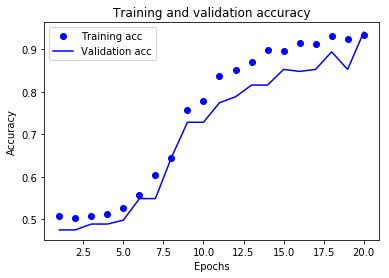

In [90]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [128]:
stroka  = "Две веселые овечки Разрезвились возле речки. Прыг-скок, прыг-скок! (Весело прыгаем) Скачут белые овечки Рано утром возле речки. Прыг-скок, прыг-скок! Вверх до неба, вниз до травки. Вверх до неба, вниз до травки. (Встаем на ножки, тянемся вверх. Приседаем, руки опускаем вниз) А потом кружились(Кружимся) И в речку свалились. (Падаем)"

In [129]:
strsplit = re.findall(r'\w+', stroka)

In [130]:
strlist = list(map(lambda y: dictionary.get(y, 0), strsplit))

In [131]:
strlist = [strlist]

In [140]:
strlist = keras.preprocessing.sequence.pad_sequences(strlist,
                                                     value=0,
                                                     padding='post',
                                                     maxlen=128)

In [141]:
strlist

array([[  0,   0,   0,   0, 300,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 300,   0,   0,   0,   0,   0,   0,  21,   0,
        277,  21,   0,   0,  21,   0, 277,  21,   0,   0,   2,   0,   0,
        324,   0,   0,   0, 277,   0,  58,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [142]:
ress = model.evaluate(strlist, [0])

1/1 [==============================] - 0s 8ms/sample - loss: 0.7789 - acc: 0.0000e+00


In [143]:
model.predict(strlist)

array([[0.54108]], dtype=float32)